In [1]:
from pathlib import Path
import pandas as pd
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

%matplotlib inline

In [2]:
DATAFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/IPR paper/data_files")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/IPR paper/figures")

In [5]:
df = pd.read_csv(DATAFOLDER / 'fig_2_body_composition.csv')

print(df.head())

       ID   sex group  fat_baseline  lean_baseline  fat_end  lean_end  \
0  MPX301  male    NR          2.57          23.65     7.30     23.16   
1  MPX302  male    NR          1.36          21.04     7.81     24.03   
2  MPX303  male   IPR          1.63          22.80     9.05     23.97   
3  MPX304  male   IPR          1.51          21.85     6.40     22.04   
4  MPX305  male    PR          1.84          22.95     4.70     21.90   

   change_in_fat  change_in_lean  
0           4.72           -0.50  
1           6.44            2.99  
2           7.42            1.17  
3           4.89            0.18  
4           2.86           -1.05  


In [17]:
df_males = df[df['sex'] == 'male']
df_females = df[df['sex'] == 'female']

In [27]:
fat_baseline_values_males = df_males.groupby('group')['fat_baseline'].apply(list).to_dict()
fat_end_values_males  = df_males.groupby('group')['fat_end'].apply(list).to_dict()
fat_change_values_males  = df_males.groupby('group')['change_in_fat'].apply(list).to_dict()
lean_baseline_values_males = df_males.groupby('group')['lean_baseline'].apply(list).to_dict()
lean_end_values_males = df_males.groupby('group')['lean_end'].apply(list).to_dict()
lean_change_values_males = df_males.groupby('group')['change_in_lean'].apply(list).to_dict()

fat_baseline_values_females = df_females.groupby('group')['fat_baseline'].apply(list).to_dict()
fat_end_values_females  = df_females.groupby('group')['fat_end'].apply(list).to_dict()
fat_change_values_females  = df_females.groupby('group')['change_in_fat'].apply(list).to_dict()
lean_baseline_values_females = df_females.groupby('group')['lean_baseline'].apply(list).to_dict()
lean_end_values_females = df_females.groupby('group')['lean_end'].apply(list).to_dict()
lean_change_values_females = df_females.groupby('group')['change_in_lean'].apply(list).to_dict()

In [79]:
colors = {'NR': ["#FF7F0E", "#ffb370"],
          'PR': ["#9467BD", "#c4abdb"],
          'IPR': ["#17BECF", "#90eaf3"]}

first_colors = {group: color_list[0] for group, color_list in colors.items()}

group_labels = ["NR", "PR", "IPR"]
scattersize=50

def create_barscatter(ax, data_baseline_values, data_end_values):
    tp.barscatter(
        [[data_baseline_values["NR"], data_end_values["NR"]], 
         [data_baseline_values["PR"], data_end_values["PR"]],
         [data_baseline_values["IPR"], data_end_values["IPR"]]],
        paired=True,
        barfacecolor_option='individual',
        barfacecolor=[color for group in group_labels for color in colors[group]],
        scattersize=scattersize,
        grouplabel=group_labels,
        scatteralpha=0.6,
        ax=ax)
    
def create_barscatter_diff(ax, data_change_values):
    tp.barscatter(
        [data_change_values["NR"], data_change_values["PR"], data_change_values["IPR"]],
        barfacecolor_option='individual',
        barfacecolor=[first_colors[group] for group in group_labels],
        scattersize=30,
        grouplabel=group_labels,
        scatteralpha=0.6,
        grouplabeloffset=-0.05,
        ax=ax)

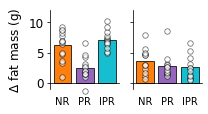

In [83]:
#change in fat mass
f,ax=plt.subplots(figsize=(3, 1.5),ncols=2, sharey=True,gridspec_kw={"bottom": 0.15, "left": 0.2})

create_barscatter_diff(ax[0], fat_change_values_males)
create_barscatter_diff(ax[1], fat_change_values_females)

ax[0].set_ylabel("$ \Delta $ fat mass (g)", fontsize = 12)
ax[0].set_ylim(-1,12)

for axis in [ax[0], ax[1]]:
    axis.tick_params(axis='both', which='major', labelsize=12)

#f.savefig(FIGSFOLDER / "fat_mass_change.pdf")  

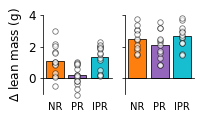

In [82]:
#change in lean mass
f,ax=plt.subplots(figsize=(3, 1.5),ncols=2, sharey=True,gridspec_kw={"bottom": 0.15, "left": 0.2})

create_barscatter_diff(ax[0], lean_change_values_males)
create_barscatter_diff(ax[1], lean_change_values_females)

ax[0].set_ylabel("$ \Delta $ lean mass (g)", fontsize = 12)
ax[0].set_ylim(-1,4)

for axis in [ax[0], ax[1]]:
    axis.tick_params(axis='both', which='major', labelsize=12)
    
#f.savefig(FIGSFOLDER / "lean_mass_change.pdf")  

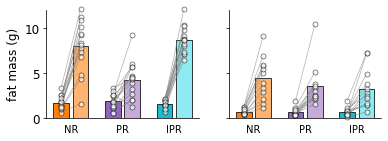

In [80]:
#fat mass

f, ax = plt.subplots(figsize=(6, 2), ncols=2, sharey=True)

create_barscatter(ax[0], fat_baseline_values_males, fat_end_values_males)
create_barscatter(ax[1], fat_baseline_values_females, fat_end_values_females)

ax[0].set_ylabel("fat mass (g)", fontsize=12)
ax[0].set_ylim(0, 12)

for axis in [ax[0], ax[1]]:
    axis.tick_params(axis='both', which='major', labelsize=12)
    
#f.savefig(FIGSFOLDER / "fat_mass.pdf")    

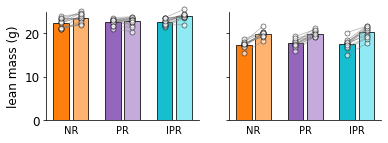

In [81]:
#lean mass

f, ax = plt.subplots(figsize=(6, 2), ncols=2, sharey=True)

create_barscatter(ax[0], lean_baseline_values_males, lean_end_values_males)
create_barscatter(ax[1], lean_baseline_values_females, lean_end_values_females)

ax[0].set_ylabel("lean mass (g)", fontsize=12)
ax[0].set_ylim(0,25)

for axis in [ax[0], ax[1]]:
    axis.tick_params(axis='both', which='major', labelsize=12)

#f.savefig(FIGSFOLDER / "lean_mass.pdf")    